In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

#### Import Data

In [2]:
df = pd.read_csv('autos.csv',sep=',',header=0,encoding = 'latin1')

#### Explore the data and look at the first few records

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

In [4]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [5]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


#### Identify missing records 

In [6]:
df.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

Lets explore the missing values to see whether we can replace them with an appropriate value or decide to drop the values.

In [7]:
df['notRepairedDamage'].value_counts()

nein    263182
ja       36286
Name: notRepairedDamage, dtype: int64

87.7% of 'notRepairedDamage' feature is 'nein'. Would be okay to replace the missing entries with the most common 
response.

In [8]:
df['notRepairedDamage'].fillna('nein',inplace=True)

Let's explore some of the other features.

In [9]:
df['fuelType'].value_counts()

benzin     223857
diesel     107746
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: fuelType, dtype: int64

66% of 'fuelType' feature is 'benzin'. The vast majority is not 'benzin' so replacing the missing values with 'benzin' might
not be the best approach. Furthermore, the accuracy of our model drops 1% if you were to replace the missing value with 
'benzin'.

In [10]:
#df['fuelType'].fillna('benzin',inplace=True)

Replace missing values with the most common entry for 'gearbox'

In [11]:
df['gearbox'].value_counts()

manuell      274214
automatik     77105
Name: gearbox, dtype: int64

In [12]:
df['gearbox'].fillna('manuell',inplace=True)

#### Drop missing records. 

DataSet is large enough that we can affort to drop a couple of the missing records without compromising our model.

In [13]:
df.dropna(inplace=True)

Look at heatmap of null values to make sure all are gone.

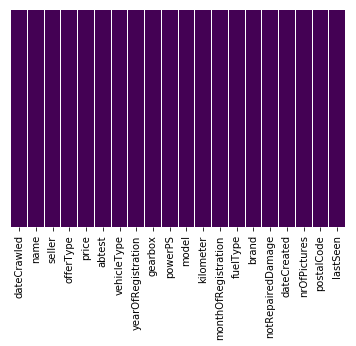

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Remove unnecessary columns 

Some of these columns do not provide any significant information. For example, 'abtest' only has 1 unique value, 'name' is
a bit redundant since the information is also stored in 'brand' and 'vehicle type' but more organized, 'lastSeen' seems to 
be irrelevant information. Explored through the kernels to see what the community opinion is on what they
think is relevant or not.

In [15]:
df.drop(['name','dateCrawled','seller','offerType','abtest','nrOfPictures',
         'lastSeen','postalCode','dateCreated','monthOfRegistration'],axis=1,inplace=True)

#### Remove outliers from the data.

Since we are doing a linear regression, it is important to address any potential outliers since they can greatly influence
the model.

In [16]:
print('Min Value: {} Max Value: {}'.format(df['price'].min(),df['price'].max()))

Min Value: 0 Max Value: 99999999


In [17]:
df['price'].describe()

count    3.071220e+05
mean     9.404320e+03
std      5.192426e+05
min      0.000000e+00
25%      1.399000e+03
50%      3.450000e+03
75%      7.980000e+03
max      1.000000e+08
Name: price, dtype: float64

Choosing to select price values above 200 and uder 40000. 

In [19]:
df = df[(df['price']>200) & (df['price']<40000)]

#### Let's evaluate some of the other features.

By removing potential outliers, I've been able to increase my models accuracy from 58% up to 80%. 

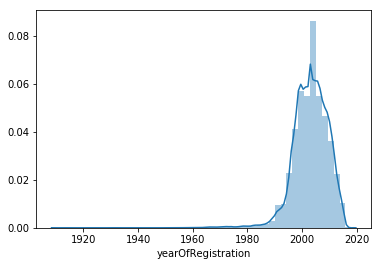

In [20]:
sns.distplot(df['yearOfRegistration'])

In [21]:
df = df[(df['yearOfRegistration']>1995) & (df['yearOfRegistration']<2016)]

In [22]:
df['powerPS'].describe()

count    269406.000000
mean        123.235151
std         164.861942
min           0.000000
25%          75.000000
50%         116.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64

In [23]:
df = df[(df['powerPS']>50)& (df['powerPS']<200)]

In [24]:
df.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
2,9800,suv,2004,automatik,163,grand,125000,diesel,jeep,nein
3,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein
4,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein
6,2200,cabrio,2004,manuell,109,2_reihe,150000,benzin,peugeot,nein
8,14500,bus,2014,manuell,125,c_max,30000,benzin,ford,nein


#### Converting categorical data into dummy variables.

In [25]:
df=pd.get_dummies(data=df,columns=['notRepairedDamage','vehicleType','model','brand','gearbox','fuelType'],drop_first=True)

In [26]:
df.head()

,price,yearOfRegistration,powerPS,kilometer,notRepairedDamage_nein,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,...,brand_toyota,brand_volkswagen,brand_volvo,gearbox_manuell,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg
2,9800,2004,163,125000,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1500,2001,75,150000,1,0,0,0,1,0,...,0,1,0,1,1,0,0,0,0,0
4,3600,2008,69,90000,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
6,2200,2004,109,150000,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
8,14500,2014,125,30000,1,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


#### Determine the indepedent and the dependent (target) variable

In [27]:
X = df.drop('price',axis=1)

y = df['price']

#### Split your data into a training set and testing set

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

## Linear Regression

Instantiate Linear Regression model  

In [29]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()

Fit Model to training data

In [30]:
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Predict using testing data

In [31]:
y_pred = LR.predict(X_test)

Evaluate your model and Accuracy

In [32]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

2515.032979506118

In [33]:
print(LR.score(X_test, y_test)*100,'% Prediction Accuracy')

79.34505219244349 % Prediction Accuracy


## Random Forest Regression

In [34]:
from sklearn.ensemble import RandomForestRegressor

Instantiate Random Forest Regressor

In [35]:
regr = RandomForestRegressor()

Fit model to training data

In [36]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Evaluate your model and Accuracy

In [38]:
print(regr.score(X_test, y_test)*100,'% Prediction Accuracy')

91.50629846297326 % Prediction Accuracy


### Identifying important features

In [50]:
feat_imp = regr.feature_importances_
x = np.argsort(feat_imp)[::1]

for element in range(X.shape[1]):
    print('%d. feature %d {%f}' % (element+1,x[element],feat_imp[x[element]]))

1. feature 92 {0.000000}
2. feature 102 {0.000000}
3. feature 198 {0.000000}
4. feature 160 {0.000000}
5. feature 120 {0.000000}
6. feature 76 {0.000000}
7. feature 30 {0.000000}
8. feature 26 {0.000000}
9. feature 124 {0.000000}
10. feature 197 {0.000000}
11. feature 162 {0.000000}
12. feature 143 {0.000000}
13. feature 31 {0.000001}
14. feature 152 {0.000001}
15. feature 184 {0.000001}
16. feature 161 {0.000001}
17. feature 139 {0.000001}
18. feature 136 {0.000001}
19. feature 151 {0.000001}
20. feature 29 {0.000002}
21. feature 175 {0.000002}
22. feature 167 {0.000002}
23. feature 137 {0.000002}
24. feature 188 {0.000002}
25. feature 247 {0.000002}
26. feature 91 {0.000002}
27. feature 157 {0.000002}
28. feature 18 {0.000003}
29. feature 87 {0.000003}
30. feature 49 {0.000003}
31. feature 206 {0.000003}
32. feature 11 {0.000003}
33. feature 133 {0.000003}
34. feature 165 {0.000003}
35. feature 32 {0.000004}
36. feature 146 {0.000004}
37. feature 203 {0.000004}
38. feature 72 {0.0000

Feature 0,1, and 2 is collectively 86.8% important when explaining the valuation of a vehicle. 

Feature 0 ='yearOfRegistration'

Feature 1 ='powerPS'

Feature 2 ='kilometer'
